In [2]:
import numpy as np
import pandas as pd
import os

In [213]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device: {}".format(device))

device: cpu


In [214]:
data_dictionary = pd.read_csv("data_dictionary.csv")
matches = pd.read_csv("Wimbledon_featured_matches.csv")

In [215]:
data_dictionary

,variables,explanation,example
0,match_id,match identification,"2023-wimbledon-1701 (""7"" is the round, and ""01..."
1,player1,first and last name of the first player,Carlos Alcaraz
2,player2,first and last name of the second player,Novak Djokovic
3,elapsed_time,time elapsed since start of first point to sta...,0:10:27
4,set_no,set number in match,"1, 2, 3, 4, or 5"
5,game_no,game number in set,"1, 2, ...,7"
6,point_no,point number in game,"1, 2, 3... etc."
7,p1_sets,sets won by player 1,"0, 1, or 2"
8,p2_sets,sets won by player 2,"0, 1, or 2"
9,p1_games,games won by player 1 in current set,"0, 1,...,6"


In [216]:
data_dictionary.shape

(46, 3)

In [217]:
data_dictionary['variables'].values

array(['match_id', 'player1', 'player2', 'elapsed_time', 'set_no',
       'game_no', 'point_no', 'p1_sets', 'p2_sets', 'p1_games',
       'p2_games', 'p1_score', 'p2_score', 'server', 'serve_no',
       'point_victor', 'p1_points_won', 'p2_points_won', 'game_victor',
       'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner',
       'winner_shot_type', 'p1_double_fault', 'p2_double_fault',
       'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed',
       'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run',
       'rally_count', 'speed_mph', 'serve_width', 'serve_depth',
       'return_depth'], dtype=object)

In [218]:
matches.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN


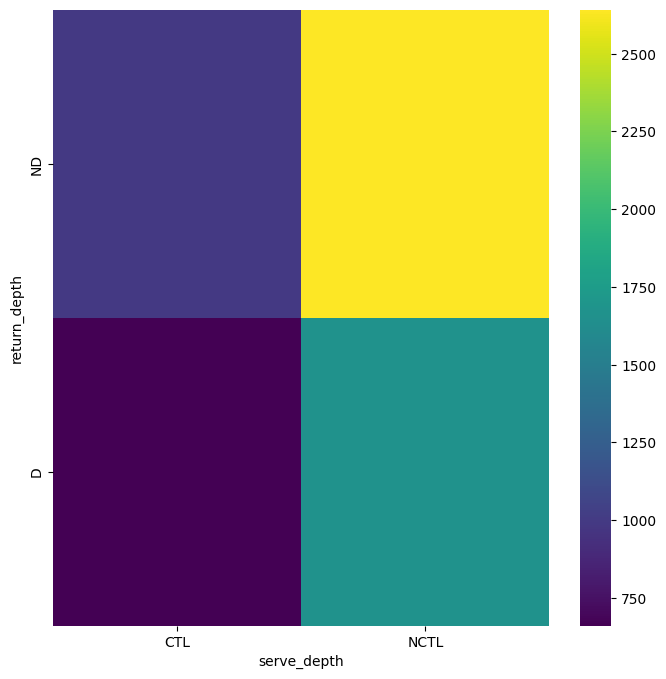

In [219]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['return_depth'].value_counts()
    for x_label, grp in matches.groupby('serve_depth')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('serve_depth')
_ = plt.ylabel('return_depth')

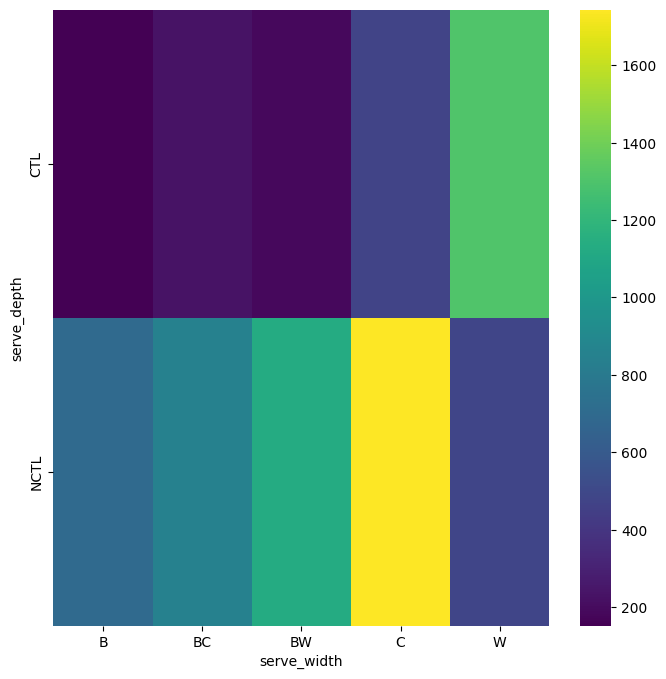

In [220]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['serve_depth'].value_counts()
    for x_label, grp in matches.groupby('serve_width')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('serve_width')
_ = plt.ylabel('serve_depth')

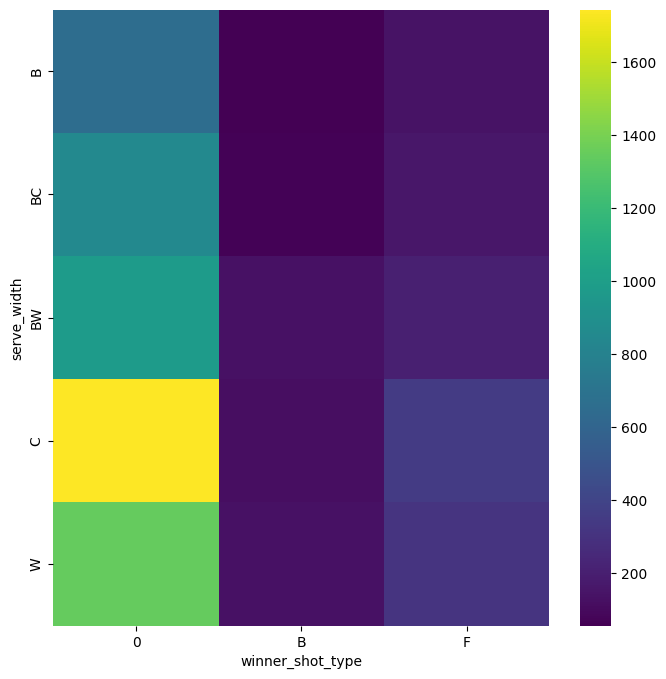

In [221]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['serve_width'].value_counts()
    for x_label, grp in matches.groupby('winner_shot_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('winner_shot_type')
_ = plt.ylabel('serve_width')

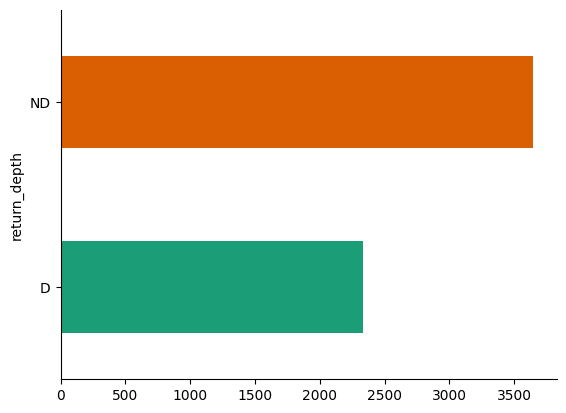

In [222]:
from matplotlib import pyplot as plt
import seaborn as sns
matches.groupby('return_depth').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

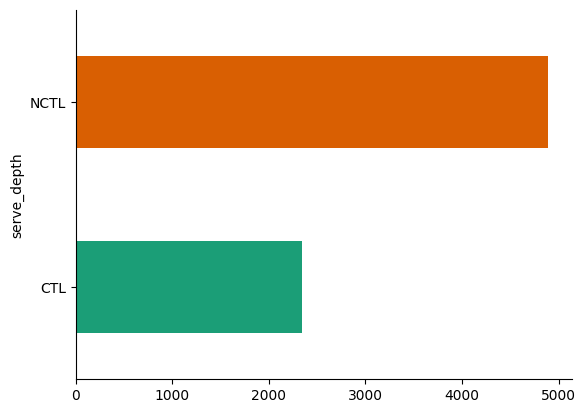

In [223]:
from matplotlib import pyplot as plt
import seaborn as sns
matches.groupby('serve_depth').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

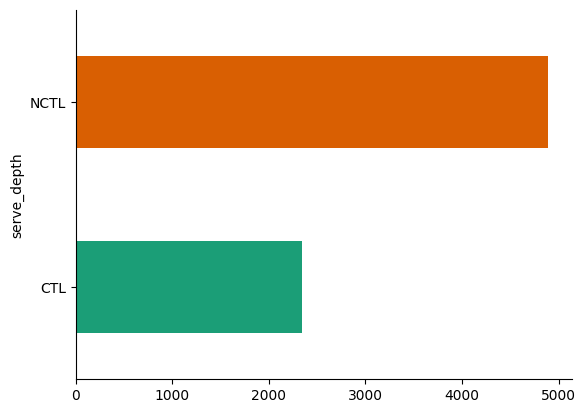

In [224]:
from matplotlib import pyplot as plt
import seaborn as sns
matches.groupby('serve_depth').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

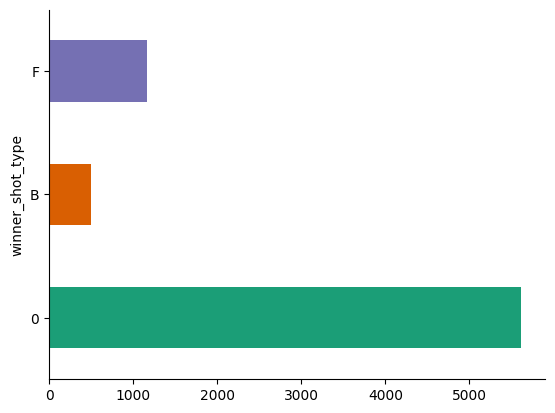

In [225]:
from matplotlib import pyplot as plt
import seaborn as sns
matches.groupby('winner_shot_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [226]:
matches.shape

(7284, 46)

In [227]:
print("Missing values")
print("------------------")
matches.isna().sum()

Missing values
------------------


match_id                 0
player1                  0
player2                  0
elapsed_time             0
set_no                   0
game_no                  0
point_no                 0
p1_sets                  0
p2_sets                  0
p1_games                 0
p2_games                 0
p1_score                 0
p2_score                 0
server                   0
serve_no                 0
point_victor             0
p1_points_won            0
p2_points_won            0
game_victor              0
set_victor               0
p1_ace                   0
p2_ace                   0
p1_winner                0
p2_winner                0
winner_shot_type         0
p1_double_fault          0
p2_double_fault          0
p1_unf_err               0
p2_unf_err               0
p1_net_pt                0
p2_net_pt                0
p1_net_pt_won            0
p2_net_pt_won            0
p1_break_pt              0
p2_break_pt              0
p1_break_pt_won          0
p2_break_pt_won          0
p

In [228]:
match_count = matches["match_id"].value_counts().sort_values()
print("Records per game, sorted")
print("------------------")
match_count

Records per game, sorted
------------------


match_id
2023-wimbledon-1403    122
2023-wimbledon-1303    134
2023-wimbledon-1601    159
2023-wimbledon-1316    167
2023-wimbledon-1311    170
2023-wimbledon-1314    185
2023-wimbledon-1501    189
2023-wimbledon-1308    190
2023-wimbledon-1503    193
2023-wimbledon-1406    195
2023-wimbledon-1315    198
2023-wimbledon-1302    201
2023-wimbledon-1602    202
2023-wimbledon-1309    213
2023-wimbledon-1405    215
2023-wimbledon-1504    217
2023-wimbledon-1401    225
2023-wimbledon-1307    232
2023-wimbledon-1305    246
2023-wimbledon-1408    271
2023-wimbledon-1402    274
2023-wimbledon-1312    275
2023-wimbledon-1502    283
2023-wimbledon-1404    286
2023-wimbledon-1313    290
2023-wimbledon-1301    300
2023-wimbledon-1310    318
2023-wimbledon-1407    331
2023-wimbledon-1306    332
2023-wimbledon-1701    334
2023-wimbledon-1304    337
Name: count, dtype: int64

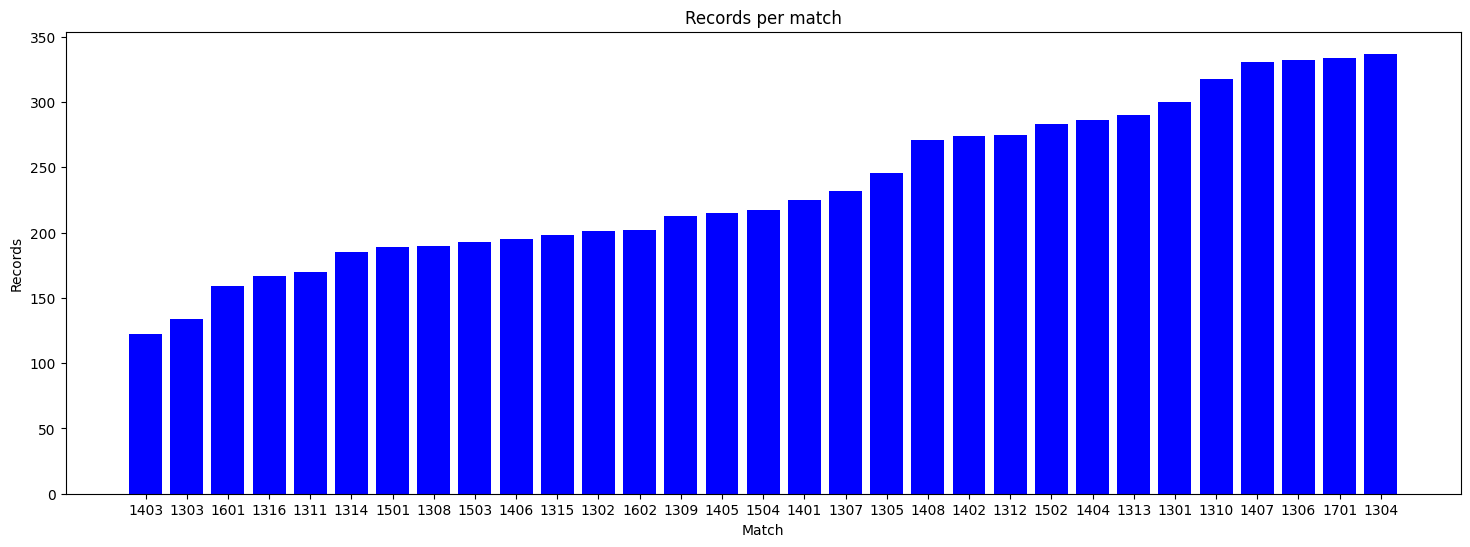

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.bar(range(len(match_count)), match_count.values, color='blue')
plt.xlabel('Match')
plt.ylabel('Records')
plt.title('Records per match')
plt.xticks(range(len(match_count)), match_count.index.astype(str).str.slice(-4))
plt.show()

In [230]:
print("Lowest number of records for a match:", match_count[0])
print("Highest number of records for a match:", match_count[-1])

Lowest number of records for a match: 122
Highest number of records for a match: 337


In [231]:
lowest_game_id = match_count.index[0]
matches[matches["match_id"]==lowest_game_id]

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
4287,2023-wimbledon-1403,Daniil Medvedev,Jiri Lehecka,00:00:00,1,1,1,0,0,0,...,0,0,0,15.999,18.557,3,112.0,W,CTL,ND
4288,2023-wimbledon-1403,Daniil Medvedev,Jiri Lehecka,00:00:26,1,1,2,0,0,0,...,0,0,0,26.087,22.571,6,100.0,B,NCTL,ND
4289,2023-wimbledon-1403,Daniil Medvedev,Jiri Lehecka,00:01:10,1,1,3,0,0,0,...,0,0,0,4.538,5.213,1,109.0,B,CTL,D
4290,2023-wimbledon-1403,Daniil Medvedev,Jiri Lehecka,00:01:42,1,1,4,0,0,0,...,0,0,0,6.779,7.981,2,124.0,W,CTL,ND
4291,2023-wimbledon-1403,Daniil Medvedev,Jiri Lehecka,00:02:05,1,1,5,0,0,0,...,0,0,0,1.038,0.961,0,NaN,W,CTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2023-wimbledon-1403,Daniil Medvedev,Jiri Lehecka,01:27:51,2,8,118,1,0,5,...,0,0,0,25.521,27.601,9,86.0,B,NCTL,ND
4405,2023-wimbledon-1403,Daniil Medvedev,Jiri Lehecka,01:28:33,2,8,119,1,0,5,...,0,0,0,0.884,1.102,1,125.0,C,CTL,NaN
4406,2023-wimbledon-1403,Daniil Medvedev,Jiri Lehecka,01:28:49,2,8,120,1,0,5,...,0,0,0,16.262,14.258,4,112.0,C,NCTL,ND
4407,2023-wimbledon-1403,Daniil Medvedev,Jiri Lehecka,01:29:25,2,8,121,1,0,5,...,0,0,0,6.513,7.821,2,102.0,B,NCTL,D


### Baseline

In [232]:
most_frequent_rd

'ND'

In [233]:
most_frequent_sw = matches['serve_width'].mode()[0]
most_frequent_sp= matches['serve_depth'].mode()[0]
most_frequent_rd = matches['return_depth'].mode()[0]
matches['serve_width'] = matches['serve_width'].fillna(most_frequent_sw)
matches['serve_depth'] = matches['serve_depth'].fillna(most_frequent_sp)
matches['return_depth'] = matches['return_depth'].fillna(most_frequent_rd)

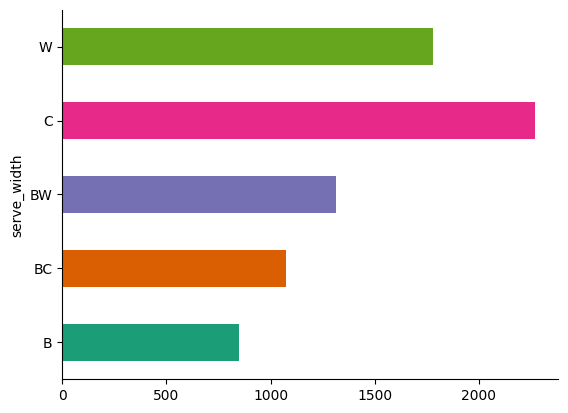

In [234]:
from matplotlib import pyplot as plt
import seaborn as sns
matches.groupby('serve_width').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

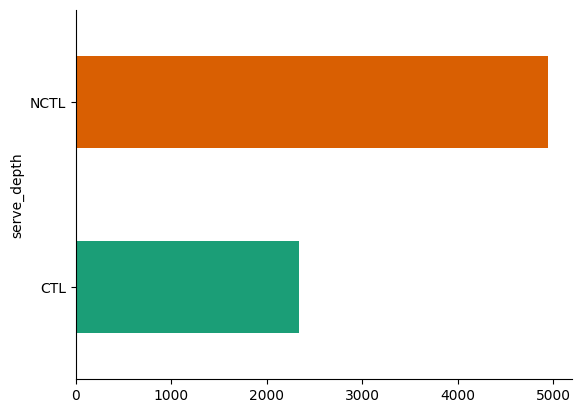

In [235]:
from matplotlib import pyplot as plt
import seaborn as sns
matches.groupby('serve_depth').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

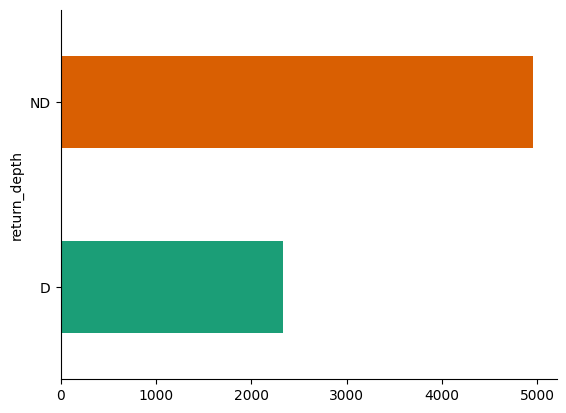

In [236]:
from matplotlib import pyplot as plt
import seaborn as sns
matches.groupby('return_depth').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [237]:
matches[matches['speed_mph'].isna()]

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
46,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:32:57,1,8,47,0,0,4,...,0,0,0,0.929,0.930,0,NaN,W,CTL,ND
158,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,02:06:20,3,1,159,1,1,0,...,0,0,0,5.450,6.694,0,NaN,B,CTL,ND
170,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,02:14:53,3,2,171,1,1,1,...,0,0,0,11.861,6.606,0,NaN,B,CTL,ND
187,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,02:28:21,3,5,188,1,1,3,...,0,0,0,1.076,1.740,0,NaN,W,CTL,ND
218,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,02:53:10,4,2,219,2,1,0,...,0,0,0,1.544,2.202,0,NaN,BW,CTL,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,03:06:36,4,1,211,2,1,0,...,0,0,0,3.792,3.847,0,NaN,BW,CTL,ND
7174,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,03:16:43,4,3,225,2,1,1,...,0,0,0,5.689,5.561,0,NaN,BW,CTL,ND
7180,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,03:20:31,4,3,231,2,1,1,...,0,0,0,2.932,2.271,0,NaN,BC,NCTL,ND
7219,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,03:52:30,4,9,270,2,1,3,...,0,0,0,1.020,0.962,0,NaN,W,CTL,ND


In [276]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)

In [277]:
for id in matches["match_id"].unique():
    if id == '2023-wimbledon-1310' or id == '2023-wimbledon-1311':
        continue
    matches.loc[(matches["match_id"]==id), ['speed_mph']] = imputer.fit_transform(matches.loc[(matches["match_id"]==id), ['speed_mph']])

In [278]:
matches["speed_mph"] = imputer.fit_transform(matches[["speed_mph"]])

In [279]:
from sklearn.preprocessing import OneHotEncoder

# List of columns to encode
columns_to_encode = ['p1_score', 'p2_score', 'game_victor', 'set_victor', 'winner_shot_type', 'serve_width', 'serve_depth', 'return_depth']

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Encode each column separately
encoded_data = encoder.fit_transform(matches[columns_to_encode])

# Convert the encoded data array back to a DataFrame
encoded_matches = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

print(encoded_matches)

      p1_score_0  p1_score_1  p1_score_15  p1_score_2  p1_score_3  \
0            1.0         0.0          0.0         0.0         0.0   
1            1.0         0.0          0.0         0.0         0.0   
2            0.0         0.0          1.0         0.0         0.0   
3            0.0         0.0          1.0         0.0         0.0   
4            0.0         0.0          0.0         0.0         0.0   
...          ...         ...          ...         ...         ...   
7279         1.0         0.0          0.0         0.0         0.0   
7280         0.0         0.0          1.0         0.0         0.0   
7281         0.0         0.0          0.0         0.0         0.0   
7282         0.0         0.0          0.0         0.0         0.0   
7283         0.0         0.0          0.0         0.0         0.0   

      p1_score_30  p1_score_4  p1_score_40  p1_score_5  p1_score_6  ...  \
0             0.0         0.0          0.0         0.0         0.0  ...   
1             0.0    

c:\Users\lehai\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [280]:
encoded_matches.iloc[0]

p1_score_0            1.0
p1_score_1            0.0
p1_score_15           0.0
p1_score_2            0.0
p1_score_3            0.0
p1_score_30           0.0
p1_score_4            0.0
p1_score_40           0.0
p1_score_5            0.0
p1_score_6            0.0
p1_score_7            0.0
p1_score_8            0.0
p1_score_9            0.0
p1_score_AD           0.0
p2_score_0            1.0
p2_score_1            0.0
p2_score_10           0.0
p2_score_15           0.0
p2_score_2            0.0
p2_score_3            0.0
p2_score_30           0.0
p2_score_4            0.0
p2_score_40           0.0
p2_score_5            0.0
p2_score_6            0.0
p2_score_7            0.0
p2_score_8            0.0
p2_score_9            0.0
p2_score_AD           0.0
game_victor_0         1.0
game_victor_1         0.0
game_victor_2         0.0
set_victor_0          1.0
set_victor_1          0.0
set_victor_2          0.0
winner_shot_type_0    1.0
winner_shot_type_B    0.0
winner_shot_type_F    0.0
serve_width_

In [281]:
matches.drop(columns_to_encode, axis=1, inplace=True)
matches = pd.concat([matches, encoded_matches], axis=1)
matches.iloc[0]

match_id            2023-wimbledon-1301
player1                  Carlos Alcaraz
player2                   Nicolas Jarry
elapsed_time                   00:00:00
set_no                                1
                           ...         
serve_width_W                       0.0
serve_depth_CTL                     0.0
serve_depth_NCTL                    1.0
return_depth_D                      0.0
return_depth_ND                     1.0
Name: 0, Length: 85, dtype: object

In [282]:
matches.shape

(7284, 85)

In [283]:
matches.to_csv("cleaned_imputed_onehot_matches.csv", index=False)